In [1]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np
import cProfile

/home/arush/anaconda3/envs/python39_1/lib/python3.9/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
SNR_array = []
random_scale = 1200

In [3]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [4]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)

17 11
l =  0  SNR =  16.788911092887016  m1 =  17  m2 =  11
18 24
l =  1  SNR =  22.776463286528163  m1 =  18  m2 =  24
10 18
l =  1  SNR =  16.529082603515423  m1 =  10  m2 =  18
15 17
l =  2  SNR =  18.351107544273926  m1 =  15  m2 =  17
10 18
l =  3  SNR =  17.034424945520033  m1 =  10  m2 =  18
19 17
l =  4  SNR =  21.294305793299532  m1 =  19  m2 =  17
24 21
l =  4  SNR =  23.597554831202178  m1 =  24  m2 =  21
27 12
l =  4  SNR =  19.891669324511106  m1 =  27  m2 =  12
29 13
l =  5  SNR =  20.30997910252699  m1 =  29  m2 =  13
28 23
l =  5  SNR =  25.29277122688554  m1 =  28  m2 =  23
12 11
l =  5  SNR =  15.701235562425806  m1 =  12  m2 =  11
21 14
l =  6  SNR =  20.551110564408976  m1 =  21  m2 =  14
23 16
l =  6  SNR =  21.81805188071772  m1 =  23  m2 =  16
14 15
l =  6  SNR =  16.58485120206888  m1 =  14  m2 =  15
18 30
l =  7  SNR =  21.977783166039067  m1 =  18  m2 =  30
10 22
l =  7  SNR =  16.465627549521873  m1 =  10  m2 =  22
20 24
l =  8  SNR =  24.46987988047344  m1 =

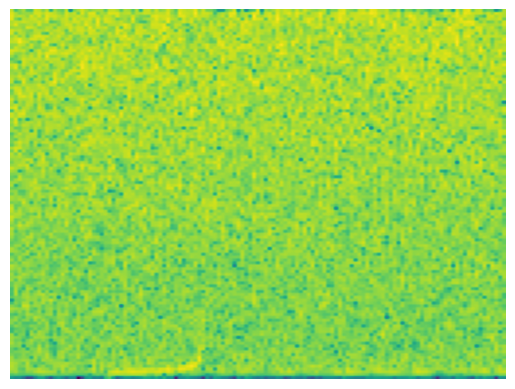

In [5]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:
    # random_scale900
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 21000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+21000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 15
l =  100  SNR =  15.322988139962776  m1 =  10  m2 =  15
28 20
l =  101  SNR =  23.649478493462233  m1 =  28  m2 =  20
11 24
l =  101  SNR =  15.854018333044827  m1 =  11  m2 =  24
24 22
l =  102  SNR =  25.011338927931497  m1 =  24  m2 =  22
27 28
l =  102  SNR =  28.63844412919574  m1 =  27  m2 =  28
26 12
l =  102  SNR =  18.17086231034927  m1 =  26  m2 =  12
19 13
l =  103  SNR =  18.149532468640384  m1 =  19  m2 =  13
14 22
l =  104  SNR =  19.707357594247142  m1 =  14  m2 =  22
28 16
l =  105  SNR =  22.33991491434772  m1 =  28  m2 =  16
16 30
l =  105  SNR =  20.92669117760034  m1 =  16  m2 =  30
27 28
l =  105  SNR =  28.004774876418303  m1 =  27  m2 =  28
20 30
l =  105  SNR =  23.694856663075136  m1 =  20  m2 =  30
13 25
l =  105  SNR =  19.272205284949067  m1 =  13  m2 =  25
16 23
l =  106  SNR =  18.46700068436057  m1 =  16  m2 =  23
20 20
l =  107  SNR =  21.85738969289644  m1 =  20  m2 =  20
14 30
l =  107  SNR =  18.818738768455322  m1 =  14  m2 =  30
12 25
l =  108

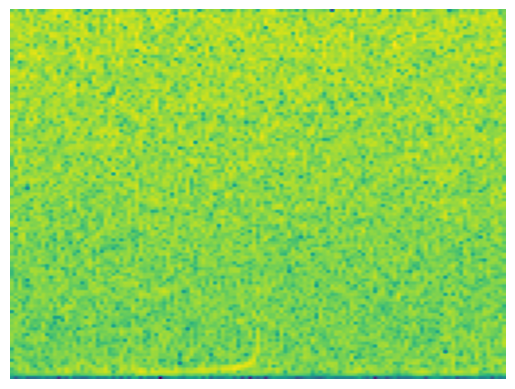

In [6]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 21000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+21000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

19 17
l =  200  SNR =  20.267835703399417  m1 =  19  m2 =  17
27 27
l =  200  SNR =  30.23488778451368  m1 =  27  m2 =  27
27 11
l =  200  SNR =  20.06477577596665  m1 =  27  m2 =  11
16 11
l =  200  SNR =  15.881494993439775  m1 =  16  m2 =  11
23 19
l =  201  SNR =  21.092903120821354  m1 =  23  m2 =  19
30 21
l =  201  SNR =  26.210149868072953  m1 =  30  m2 =  21
14 11
l =  201  SNR =  16.686621760322232  m1 =  14  m2 =  11
22 11
l =  202  SNR =  17.615050465045687  m1 =  22  m2 =  11
27 18
l =  203  SNR =  22.17405913125405  m1 =  27  m2 =  18
11 26
l =  203  SNR =  16.595208090061853  m1 =  11  m2 =  26
24 13
l =  204  SNR =  17.51158486159303  m1 =  24  m2 =  13
29 19
l =  205  SNR =  25.05535466079659  m1 =  29  m2 =  19
12 19
l =  205  SNR =  17.75928390871229  m1 =  12  m2 =  19
15 22
l =  206  SNR =  20.661681073675435  m1 =  15  m2 =  22
15 18
l =  206  SNR =  16.40381959598612  m1 =  15  m2 =  18
29 12
l =  207  SNR =  19.828971285109205  m1 =  29  m2 =  12
13 24
l =  208 

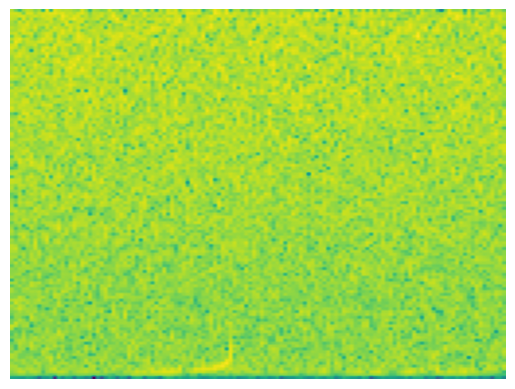

In [7]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 21000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+21000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

28 10
l =  300  SNR =  15.938204376885482  m1 =  28  m2 =  10
18 10
l =  301  SNR =  16.13564616232772  m1 =  18  m2 =  10
15 23
l =  302  SNR =  20.399074263702246  m1 =  15  m2 =  23
20 21
l =  302  SNR =  21.172875201182325  m1 =  20  m2 =  21
22 15
l =  302  SNR =  19.734494923761318  m1 =  22  m2 =  15
11 21
l =  303  SNR =  16.298671463663847  m1 =  11  m2 =  21
13 14
l =  304  SNR =  17.104433202688337  m1 =  13  m2 =  14
12 21
l =  305  SNR =  15.911515119741185  m1 =  12  m2 =  21
18 27
l =  306  SNR =  23.178597820626877  m1 =  18  m2 =  27
27 26
l =  306  SNR =  25.699825146691154  m1 =  27  m2 =  26
21 15
l =  306  SNR =  17.300432934536097  m1 =  21  m2 =  15
21 12
l =  307  SNR =  15.977885525562504  m1 =  21  m2 =  12
10 25
l =  308  SNR =  16.309902594785868  m1 =  10  m2 =  25
13 17
l =  309  SNR =  15.62928304011178  m1 =  13  m2 =  17
20 13
l =  310  SNR =  17.085756391757034  m1 =  20  m2 =  13
23 11
l =  311  SNR =  17.06502332218624  m1 =  23  m2 =  11
24 12
l =  

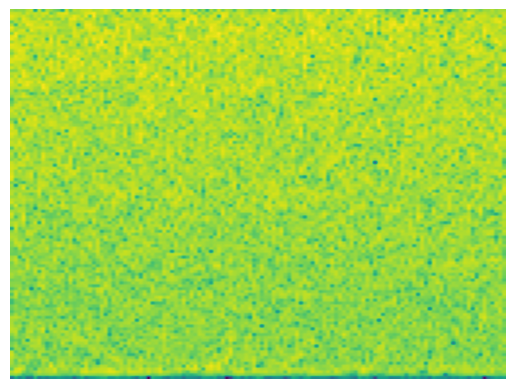

In [8]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 21000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+21000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 16
l =  400  SNR =  21.043104558994354  m1 =  25  m2 =  16
25 19
l =  400  SNR =  23.908785938670757  m1 =  25  m2 =  19
12 22
l =  400  SNR =  17.435314749113452  m1 =  12  m2 =  22
27 13
l =  401  SNR =  18.836089496340602  m1 =  27  m2 =  13
26 16
l =  402  SNR =  22.472869737858655  m1 =  26  m2 =  16
14 15
l =  402  SNR =  17.743917294825163  m1 =  14  m2 =  15
27 11
l =  403  SNR =  18.341859385271395  m1 =  27  m2 =  11
28 29
l =  404  SNR =  29.52455338117373  m1 =  28  m2 =  29
24 22
l =  404  SNR =  23.009219176900853  m1 =  24  m2 =  22
20 28
l =  404  SNR =  24.722794839798603  m1 =  20  m2 =  28
30 22
l =  404  SNR =  26.285510416024422  m1 =  30  m2 =  22
12 20
l =  404  SNR =  18.922287478081383  m1 =  12  m2 =  20
24 29
l =  405  SNR =  26.989410959611988  m1 =  24  m2 =  29
22 11
l =  405  SNR =  17.339545179965487  m1 =  22  m2 =  11
12 13
l =  406  SNR =  16.223104017428586  m1 =  12  m2 =  13
26 29
l =  407  SNR =  28.91707804730613  m1 =  26  m2 =  29
30 21
l = 

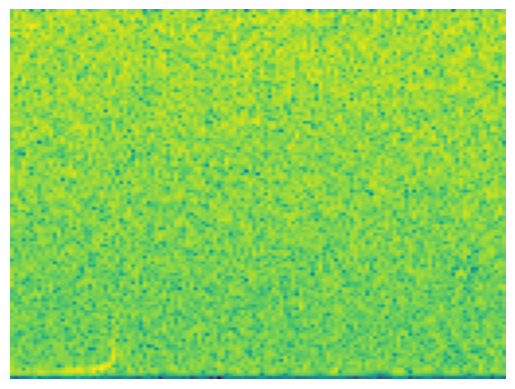

In [9]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 21000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+21000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [10]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 21000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+21000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

15 19
l =  500  SNR =  20.5088042163233  m1 =  15  m2 =  19
26 26
l =  500  SNR =  27.37111647709961  m1 =  26  m2 =  26
26 12
l =  500  SNR =  19.974893564726134  m1 =  26  m2 =  12
20 27
l =  501  SNR =  24.41721844370902  m1 =  20  m2 =  27
17 19
l =  501  SNR =  20.669685627283542  m1 =  17  m2 =  19
25 15
l =  501  SNR =  21.845206907229166  m1 =  25  m2 =  15
29 29
l =  501  SNR =  28.02862304859692  m1 =  29  m2 =  29
22 10
l =  501  SNR =  16.476408665162047  m1 =  22  m2 =  10
25 28
l =  502  SNR =  26.69394927618425  m1 =  25  m2 =  28
16 19
l =  502  SNR =  18.803506741071036  m1 =  16  m2 =  19
23 27
l =  503  SNR =  25.56483284636427  m1 =  23  m2 =  27
24 26
l =  503  SNR =  25.926340154732095  m1 =  24  m2 =  26
26 12
l =  503  SNR =  17.896765138184296  m1 =  26  m2 =  12
30 14
l =  504  SNR =  22.279455963346873  m1 =  30  m2 =  14
19 12
l =  504  SNR =  17.67863391123914  m1 =  19  m2 =  12
17 30
l =  505  SNR =  23.672567172233347  m1 =  17  m2 =  30
16 19
l =  505  

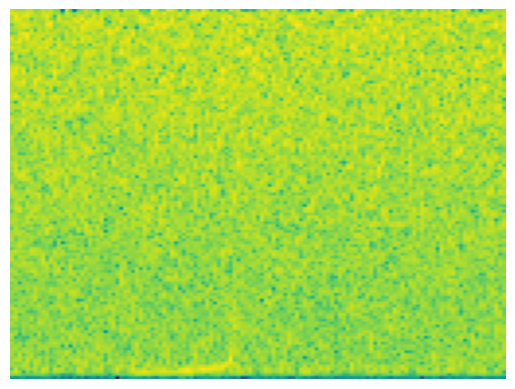

In [11]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 21000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+21000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

21 23
l =  600  SNR =  22.2772475656869  m1 =  21  m2 =  23
16 13
l =  600  SNR =  17.940230700881997  m1 =  16  m2 =  13
14 15
l =  601  SNR =  19.14587688362254  m1 =  14  m2 =  15
20 16
l =  602  SNR =  19.95942542208853  m1 =  20  m2 =  16
26 27
l =  603  SNR =  25.90315004073318  m1 =  26  m2 =  27
25 18
l =  603  SNR =  21.649888544728622  m1 =  25  m2 =  18
19 23
l =  603  SNR =  23.0954031669418  m1 =  19  m2 =  23
21 14
l =  603  SNR =  18.67863818008709  m1 =  21  m2 =  14
14 13
l =  604  SNR =  16.54937593654392  m1 =  14  m2 =  13
17 16
l =  605  SNR =  19.752253311899395  m1 =  17  m2 =  16
13 30
l =  606  SNR =  20.47162715375071  m1 =  13  m2 =  30
15 27
l =  606  SNR =  21.480578162607447  m1 =  15  m2 =  27
27 17
l =  606  SNR =  22.195813618099173  m1 =  27  m2 =  17
11 19
l =  606  SNR =  17.962470991222226  m1 =  11  m2 =  19
15 15
l =  607  SNR =  15.500613796695221  m1 =  15  m2 =  15
12 23
l =  608  SNR =  17.036387583906933  m1 =  12  m2 =  23
23 20
l =  609  SN

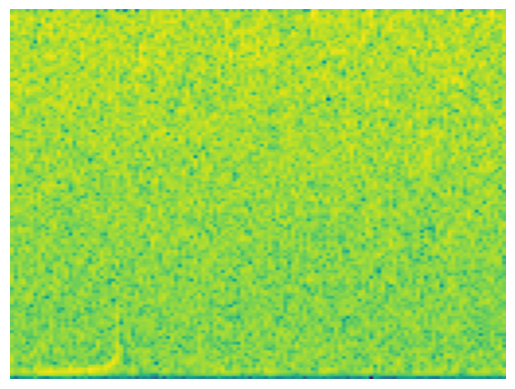

In [12]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 21000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+21000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 13
l =  700  SNR =  20.07701706587575  m1 =  24  m2 =  13
28 30
l =  700  SNR =  27.373095621503285  m1 =  28  m2 =  30
18 30
l =  700  SNR =  24.081580373306444  m1 =  18  m2 =  30
25 28
l =  700  SNR =  26.472521080246462  m1 =  25  m2 =  28
19 26
l =  700  SNR =  22.793668781044197  m1 =  19  m2 =  26
17 16
l =  700  SNR =  19.610257005431855  m1 =  17  m2 =  16
30 27
l =  701  SNR =  26.001542441999522  m1 =  30  m2 =  27
25 17
l =  701  SNR =  24.14749726664472  m1 =  25  m2 =  17
16 11
l =  701  SNR =  16.91809935057066  m1 =  16  m2 =  11
25 13
l =  702  SNR =  19.348648526426683  m1 =  25  m2 =  13
22 29
l =  703  SNR =  24.90326025240352  m1 =  22  m2 =  29
27 28
l =  703  SNR =  27.50267586507923  m1 =  27  m2 =  28
29 22
l =  703  SNR =  24.90326025240352  m1 =  29  m2 =  22
12 28
l =  703  SNR =  16.011592850847144  m1 =  12  m2 =  28
18 12
l =  704  SNR =  16.542185564562452  m1 =  18  m2 =  12
10 27
l =  705  SNR =  17.249401608565623  m1 =  10  m2 =  27
13 26
l =  706

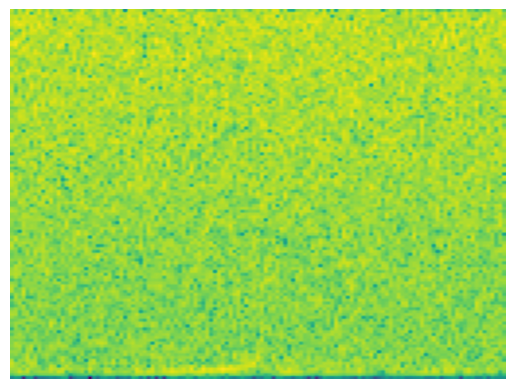

In [13]:
l = 700
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 21000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+21000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

15 18
l =  800  SNR =  16.927813605154217  m1 =  15  m2 =  18
19 13
l =  801  SNR =  16.956027619289486  m1 =  19  m2 =  13
24 22
l =  802  SNR =  24.12694869509483  m1 =  24  m2 =  22
13 24
l =  802  SNR =  20.46125586181357  m1 =  13  m2 =  24
16 19
l =  802  SNR =  19.46605442997992  m1 =  16  m2 =  19
18 22
l =  803  SNR =  19.947513122358504  m1 =  18  m2 =  22
22 24
l =  804  SNR =  24.0200612379182  m1 =  22  m2 =  24
12 11
l =  804  SNR =  13.286715495803735  m1 =  12  m2 =  11
26 29
l =  805  SNR =  28.7858535602519  m1 =  26  m2 =  29
20 19
l =  805  SNR =  21.60257746020671  m1 =  20  m2 =  19
14 22
l =  805  SNR =  18.158838723201782  m1 =  14  m2 =  22
27 13
l =  806  SNR =  19.75020310881064  m1 =  27  m2 =  13
17 29
l =  807  SNR =  23.154336529189454  m1 =  17  m2 =  29
29 13
l =  807  SNR =  21.52045037719554  m1 =  29  m2 =  13
20 15
l =  807  SNR =  18.77922995365363  m1 =  20  m2 =  15
12 18
l =  808  SNR =  17.87374245319679  m1 =  12  m2 =  18
18 30
l =  809  SNR 

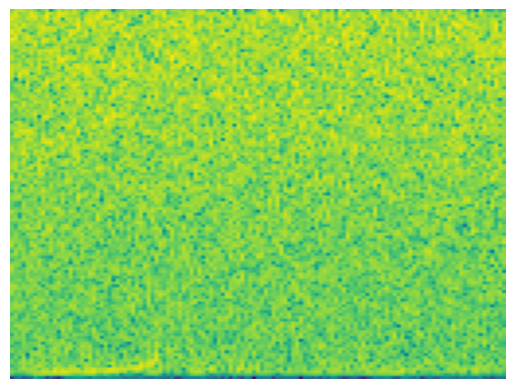

In [14]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 21000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+21000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

11 12
l =  900  SNR =  13.995576682802913  m1 =  11  m2 =  12
19 10
l =  901  SNR =  14.95226055729922  m1 =  19  m2 =  10
13 14
l =  902  SNR =  15.78293106491149  m1 =  13  m2 =  14
11 29
l =  903  SNR =  16.850199293785796  m1 =  11  m2 =  29
14 25
l =  904  SNR =  21.766976574974066  m1 =  14  m2 =  25
13 17
l =  904  SNR =  17.037905060094808  m1 =  13  m2 =  17
24 23
l =  905  SNR =  26.14177240480592  m1 =  24  m2 =  23
18 28
l =  905  SNR =  22.237808263626203  m1 =  18  m2 =  28
10 24
l =  905  SNR =  17.14909127630843  m1 =  10  m2 =  24
11 19
l =  906  SNR =  16.1697193966412  m1 =  11  m2 =  19
24 29
l =  907  SNR =  25.88937330148438  m1 =  24  m2 =  29
20 27
l =  907  SNR =  24.086356427552808  m1 =  20  m2 =  27
27 14
l =  907  SNR =  19.08716363075347  m1 =  27  m2 =  14
13 21
l =  908  SNR =  18.139873796887525  m1 =  13  m2 =  21
23 30
l =  909  SNR =  26.484214793310294  m1 =  23  m2 =  30
27 17
l =  909  SNR =  21.282771989569873  m1 =  27  m2 =  17
16 28
l =  909  

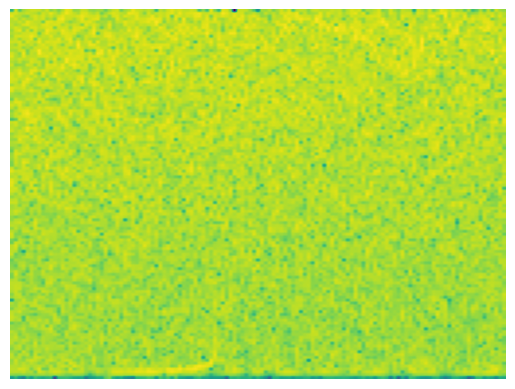

In [15]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 21000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+21000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

30 25
l =  1000  SNR =  26.964739662768054  m1 =  30  m2 =  25
25 20
l =  1000  SNR =  24.531522556464438  m1 =  25  m2 =  20
26 18
l =  1000  SNR =  23.63832129690737  m1 =  26  m2 =  18
20 20
l =  1000  SNR =  22.855687112933705  m1 =  20  m2 =  20
27 15
l =  1000  SNR =  20.29312175759284  m1 =  27  m2 =  15
20 16
l =  1000  SNR =  20.16956152870832  m1 =  20  m2 =  16
24 26
l =  1000  SNR =  25.85799066926318  m1 =  24  m2 =  26
11 20
l =  1000  SNR =  16.000266947817323  m1 =  11  m2 =  20
24 20
l =  1001  SNR =  23.528916624704653  m1 =  24  m2 =  20
21 23
l =  1001  SNR =  22.874099699252696  m1 =  21  m2 =  23
22 23
l =  1001  SNR =  25.792860294265214  m1 =  22  m2 =  23
29 23
l =  1001  SNR =  28.88556174448508  m1 =  29  m2 =  23
15 25
l =  1001  SNR =  19.604542483205236  m1 =  15  m2 =  25
23 20
l =  1002  SNR =  20.977469421692724  m1 =  23  m2 =  20
14 14
l =  1002  SNR =  14.671376299867173  m1 =  14  m2 =  14
28 20
l =  1003  SNR =  23.25862373874786  m1 =  28  m2 =  2

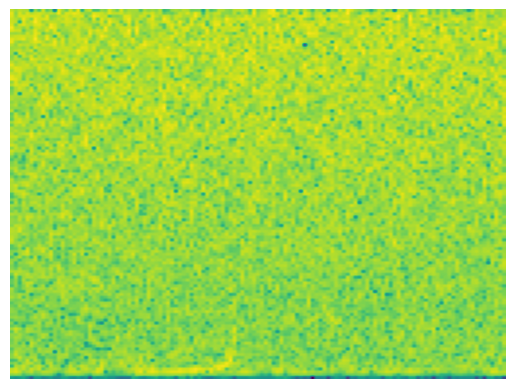

In [16]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 21000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+21000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

14 15
l =  1100  SNR =  18.91897922443949  m1 =  14  m2 =  15
29 12
l =  1101  SNR =  19.07214985541174  m1 =  29  m2 =  12
27 24
l =  1102  SNR =  26.89733270021834  m1 =  27  m2 =  24
26 30
l =  1102  SNR =  29.741741090310104  m1 =  26  m2 =  30
23 11
l =  1102  SNR =  18.44491631596588  m1 =  23  m2 =  11
30 29
l =  1103  SNR =  27.6337021900198  m1 =  30  m2 =  29
21 21
l =  1103  SNR =  21.90326194365246  m1 =  21  m2 =  21
15 24
l =  1103  SNR =  19.60534949495135  m1 =  15  m2 =  24
22 16
l =  1104  SNR =  21.62988658839404  m1 =  22  m2 =  16
30 21
l =  1104  SNR =  24.450142543179073  m1 =  30  m2 =  21
10 13
l =  1104  SNR =  16.032299129692035  m1 =  10  m2 =  13
26 25
l =  1105  SNR =  25.495357295468533  m1 =  26  m2 =  25
25 30
l =  1105  SNR =  26.40610527020331  m1 =  25  m2 =  30
29 20
l =  1105  SNR =  23.202251058405807  m1 =  29  m2 =  20
16 15
l =  1105  SNR =  18.803863111932063  m1 =  16  m2 =  15
21 17
l =  1106  SNR =  21.21217467360113  m1 =  21  m2 =  17
27 

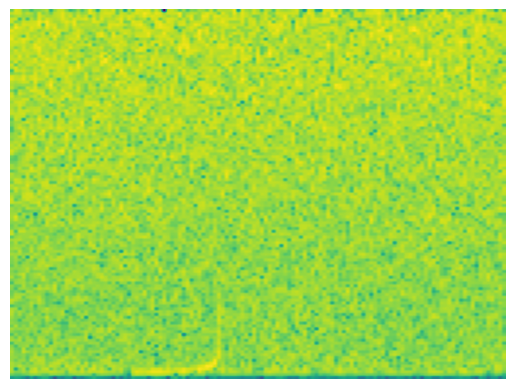

In [17]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 21000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+21000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 18
l =  1200  SNR =  25.081994854677454  m1 =  25  m2 =  18
27 24
l =  1200  SNR =  26.078169109849128  m1 =  27  m2 =  24
19 29
l =  1200  SNR =  25.39049670404604  m1 =  19  m2 =  29
27 22
l =  1200  SNR =  22.89505291396393  m1 =  27  m2 =  22
26 20
l =  1200  SNR =  23.164424213262528  m1 =  26  m2 =  20
18 23
l =  1200  SNR =  21.201545176012736  m1 =  18  m2 =  23
23 16
l =  1200  SNR =  18.964226264575252  m1 =  23  m2 =  16
26 10
l =  1201  SNR =  15.633328487966901  m1 =  26  m2 =  10
22 27
l =  1202  SNR =  25.40131859388378  m1 =  22  m2 =  27
24 22
l =  1202  SNR =  23.537309708901454  m1 =  24  m2 =  22
18 28
l =  1202  SNR =  21.857524650441064  m1 =  18  m2 =  28
12 14
l =  1202  SNR =  15.741213310877685  m1 =  12  m2 =  14
29 25
l =  1203  SNR =  27.733732005670813  m1 =  29  m2 =  25
21 23
l =  1203  SNR =  24.073472997639513  m1 =  21  m2 =  23
11 19
l =  1203  SNR =  17.83540149449235  m1 =  11  m2 =  19
21 10
l =  1204  SNR =  15.46604858641756  m1 =  21  m2 =  

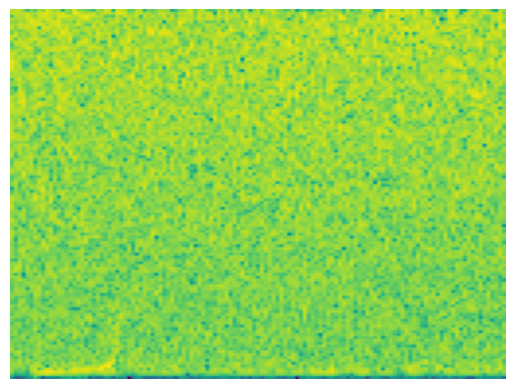

In [18]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 21000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+21000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

13 23
l =  1300  SNR =  20.371882937378242  m1 =  13  m2 =  23
28 14
l =  1300  SNR =  21.352445863810637  m1 =  28  m2 =  14
29 15
l =  1300  SNR =  21.873565116564112  m1 =  29  m2 =  15
14 29
l =  1300  SNR =  20.21323347408208  m1 =  14  m2 =  29
12 22
l =  1300  SNR =  20.26367156785986  m1 =  12  m2 =  22
13 25
l =  1300  SNR =  20.77762484518247  m1 =  13  m2 =  25
29 15
l =  1300  SNR =  22.921691610652385  m1 =  29  m2 =  15
16 29
l =  1300  SNR =  21.07961939282998  m1 =  16  m2 =  29
30 21
l =  1300  SNR =  24.82133921363941  m1 =  30  m2 =  21
25 17
l =  1300  SNR =  20.887416826542246  m1 =  25  m2 =  17
11 11
l =  1300  SNR =  14.420446755297819  m1 =  11  m2 =  11
18 11
l =  1301  SNR =  16.9839034042906  m1 =  18  m2 =  11
13 14
l =  1302  SNR =  15.356830890039339  m1 =  13  m2 =  14
30 22
l =  1303  SNR =  26.659263806977112  m1 =  30  m2 =  22
25 24
l =  1303  SNR =  24.716791435353276  m1 =  25  m2 =  24
20 24
l =  1303  SNR =  22.858270705853787  m1 =  20  m2 =  24

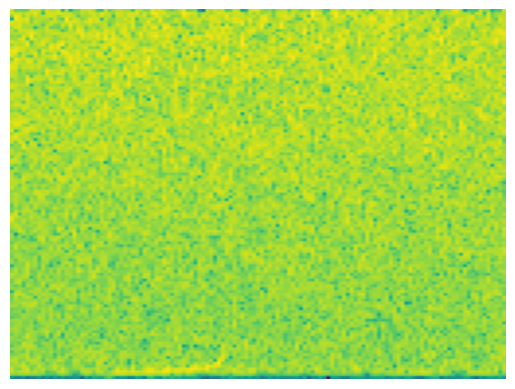

In [19]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 21000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+21000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

18 11
l =  1400  SNR =  14.223724172433332  m1 =  18  m2 =  11
17 17
l =  1401  SNR =  19.146290921165054  m1 =  17  m2 =  17
27 26
l =  1402  SNR =  26.462868835341865  m1 =  27  m2 =  26
13 23
l =  1402  SNR =  19.500016536473492  m1 =  13  m2 =  23
19 19
l =  1403  SNR =  20.378475682302344  m1 =  19  m2 =  19
14 11
l =  1403  SNR =  15.260203145811667  m1 =  14  m2 =  11
12 29
l =  1404  SNR =  19.135379393321326  m1 =  12  m2 =  29
27 17
l =  1405  SNR =  23.271620122404222  m1 =  27  m2 =  17
15 20
l =  1405  SNR =  17.96426993286626  m1 =  15  m2 =  20
13 19
l =  1406  SNR =  16.58392143274259  m1 =  13  m2 =  19
18 27
l =  1407  SNR =  23.267936639651435  m1 =  18  m2 =  27
21 19
l =  1407  SNR =  20.202076400479175  m1 =  21  m2 =  19
21 25
l =  1407  SNR =  23.309504614954694  m1 =  21  m2 =  25
24 15
l =  1407  SNR =  17.85756972530094  m1 =  24  m2 =  15
17 17
l =  1408  SNR =  20.57862797819837  m1 =  17  m2 =  17
10 12
l =  1408  SNR =  14.37383043623024  m1 =  10  m2 =  

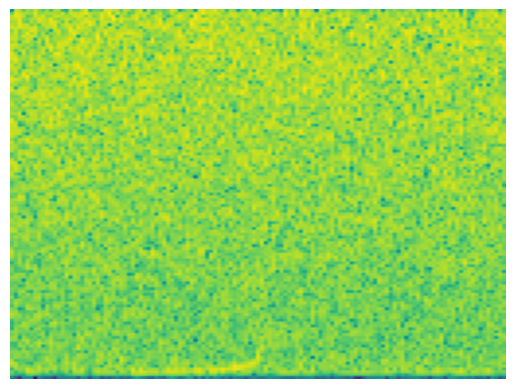

In [20]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 21000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+21000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
